In [44]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from pylab import rcParams
import scipy.stats as stats

In [3]:
bins = [0,25,50,75,100]

In [6]:
results = [random.randint(1, 100) for x in range(10000)]

In [8]:
cat = pd.cut(results, bins)

In [9]:
cat

[(75, 100], (0, 25], (50, 75], (50, 75], (25, 50], ..., (25, 50], (25, 50], (0, 25], (25, 50], (25, 50]]
Length: 10000
Categories (4, interval[int64, right]): [(0, 25] < (25, 50] < (50, 75] < (75, 100]]

In [10]:
pd.value_counts(cat)

(0, 25]      2517
(25, 50]     2501
(50, 75]     2496
(75, 100]    2486
dtype: int64

# np.random.randn(10000) 표준편차 구하기

In [32]:
df_ran =pd.DataFrame(np.random.randn(10000))  # 무작위 숫자 10000개

In [33]:
type(df_ran)

pandas.core.frame.DataFrame

In [37]:
pd.value_counts(df_ran[0])

 0.520150    1
 1.086663    1
 1.628496    1
-0.570132    1
-0.217270    1
            ..
 0.831383    1
 1.260165    1
 0.817952    1
-0.429416    1
 0.825662    1
Name: 0, Length: 10000, dtype: int64

In [15]:
pd.cut(ran, 5)

[(-2.512, -0.947], (-2.512, -0.947], (0.618, 2.183], (-0.947, 0.618], (-2.512, -0.947], ..., (-0.947, 0.618], (-0.947, 0.618], (-0.947, 0.618], (-0.947, 0.618], (-0.947, 0.618]]
Length: 10000
Categories (5, interval[float64, right]): [(-4.085, -2.512] < (-2.512, -0.947] < (-0.947, 0.618] < (0.618, 2.183] < (2.183, 3.748]]

In [19]:
bins2 = [-2,-1,0,1,2]

In [27]:
quintiles = pd.cut(ran, bins2)

In [28]:
quintiles

[(-2.0, -1.0], NaN, (1.0, 2.0], (0.0, 1.0], (-2.0, -1.0], ..., (0, 1], (-1, 0], (0, 1], (-1, 0], (0, 1]]
Length: 10000
Categories (4, interval[int64, right]): [(-2, -1] < (-1, 0] < (0, 1] < (1, 2]]

In [29]:
pd.value_counts(quintiles)

(0, 1]      3431
(-1, 0]     3316
(1, 2]      1431
(-2, -1]    1314
dtype: int64

In [41]:
cv1_mean = np.mean(df_ran[0])   # -0.012955121566255232
cv1_std = np.std(df_ran[0])     # 0.9878080774142642

In [43]:
cv1_pdf = stats.norm.pdf(df_ran[0].sort_values(), cv1_mean, cv1_std)

ValueError: too many values to unpack (expected 2)

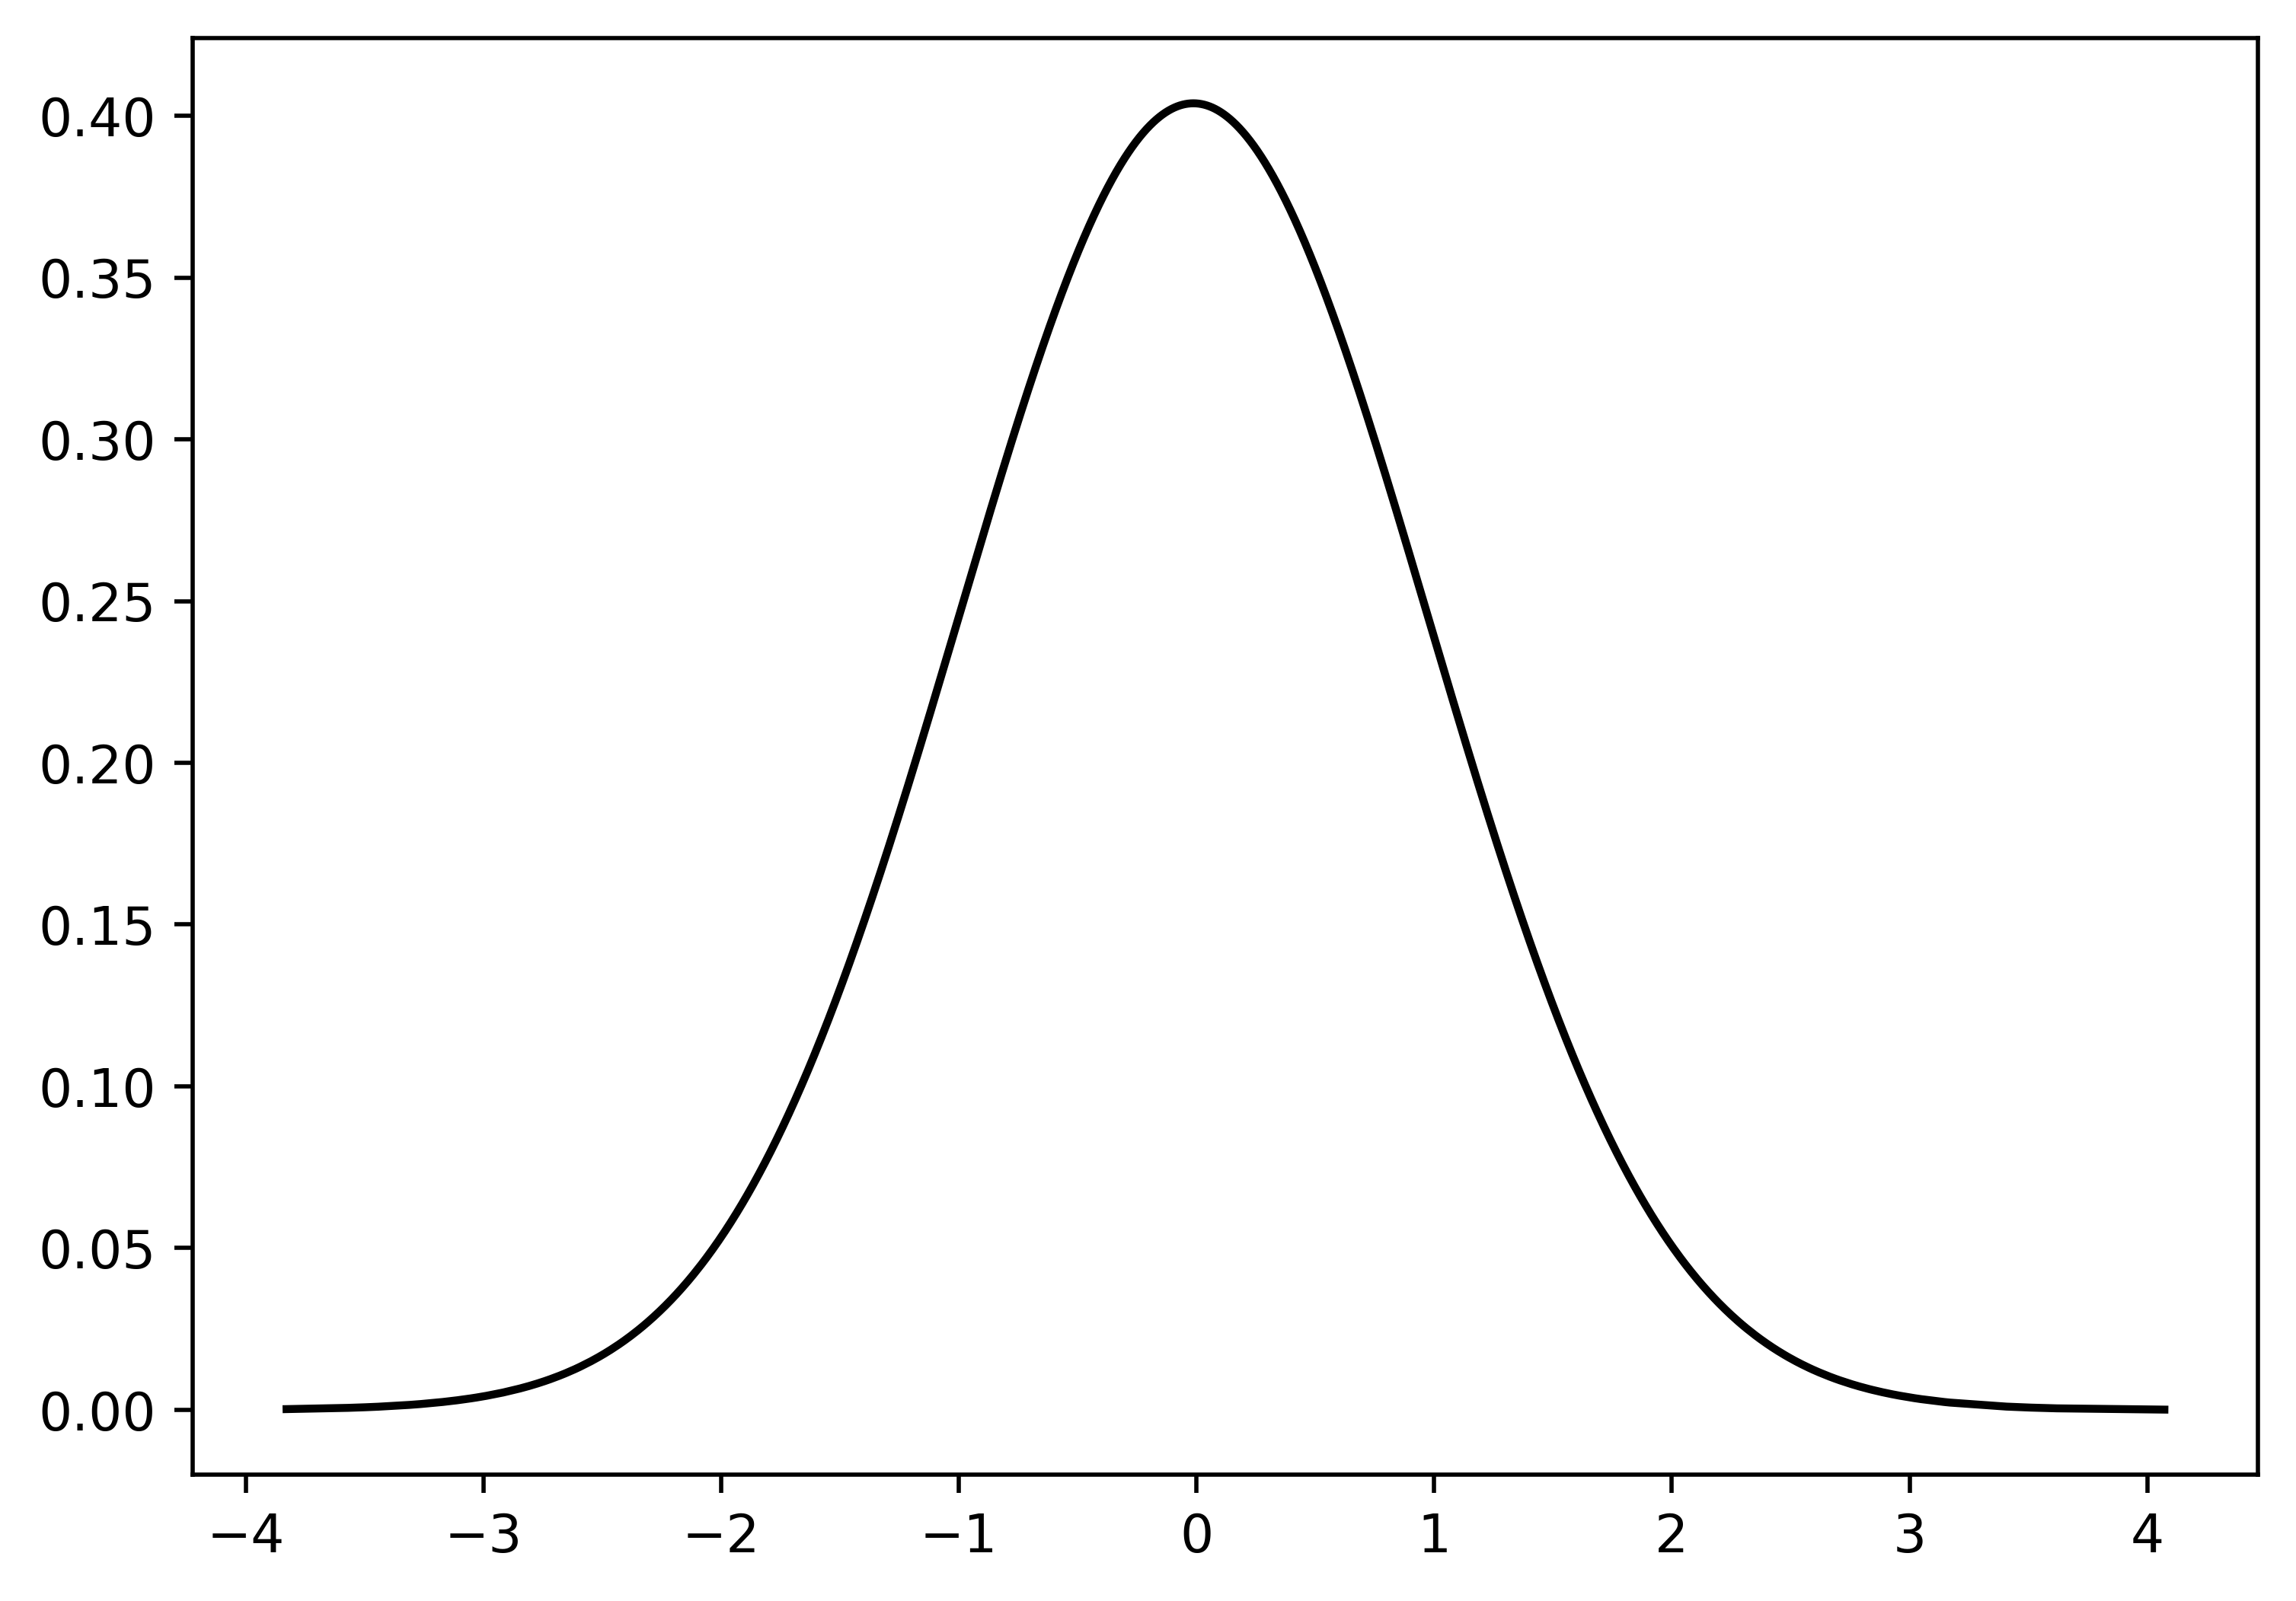

In [47]:
plt.plot(df_ran[0].sort_values(), cv1_pdf, color="Black", label="Cultivar_A")
plt.xlim(bins2)
plt.ylim(bins2)
plt.legend()
plt.xlabel("Grain area (mm2)", size=10)
plt.ylabel("Frequency", size=10)
plt.grid(True, alpha=0.3, linestyle="--")
plt.rcParams["figure.figsize"] = [7,5]  # 가로, 세로 인치 조정
plt.rcParams["figure.dpi"] = 500   # 해상도 조정
plt.show()

# np.random.rand(10000) 균등분포 구하기

In [88]:
uni = [np.random.rand() for x in range(10000)]

In [111]:
bins3 = [0, 0.25, 0.5, 0.75, 1.0]

In [112]:
quintiles = pd.cut(uni, bins3)
pd.value_counts(quintiles)

(0.75, 1.0]    2597
(0.0, 0.25]    2508
(0.25, 0.5]    2466
(0.5, 0.75]    2429
dtype: int64

In [113]:
quintiles

[(0.75, 1.0], (0.5, 0.75], (0.5, 0.75], (0.75, 1.0], (0.75, 1.0], ..., (0.75, 1.0], (0.0, 0.25], (0.5, 0.75], (0.5, 0.75], (0.0, 0.25]]
Length: 10000
Categories (4, interval[float64, right]): [(0.0, 0.25] < (0.25, 0.5] < (0.5, 0.75] < (0.75, 1.0]]

### randn과 달리 고르게 분포됨

In [114]:
pd.value_counts(quintiles)

(0.75, 1.0]    2597
(0.0, 0.25]    2508
(0.25, 0.5]    2466
(0.5, 0.75]    2429
dtype: int64

In [118]:
df_uni =pd.DataFrame(uni)

In [116]:
cv2_mean = np.mean(df_uni[0])   # -0.012955121566255232
cv2_std = np.std(df_uni[0])  

cv2_pdf = stats.norm.pdf(df_uni[0].sort_values(), cv2_mean, cv2_std)

ValueError: too many values to unpack (expected 2)

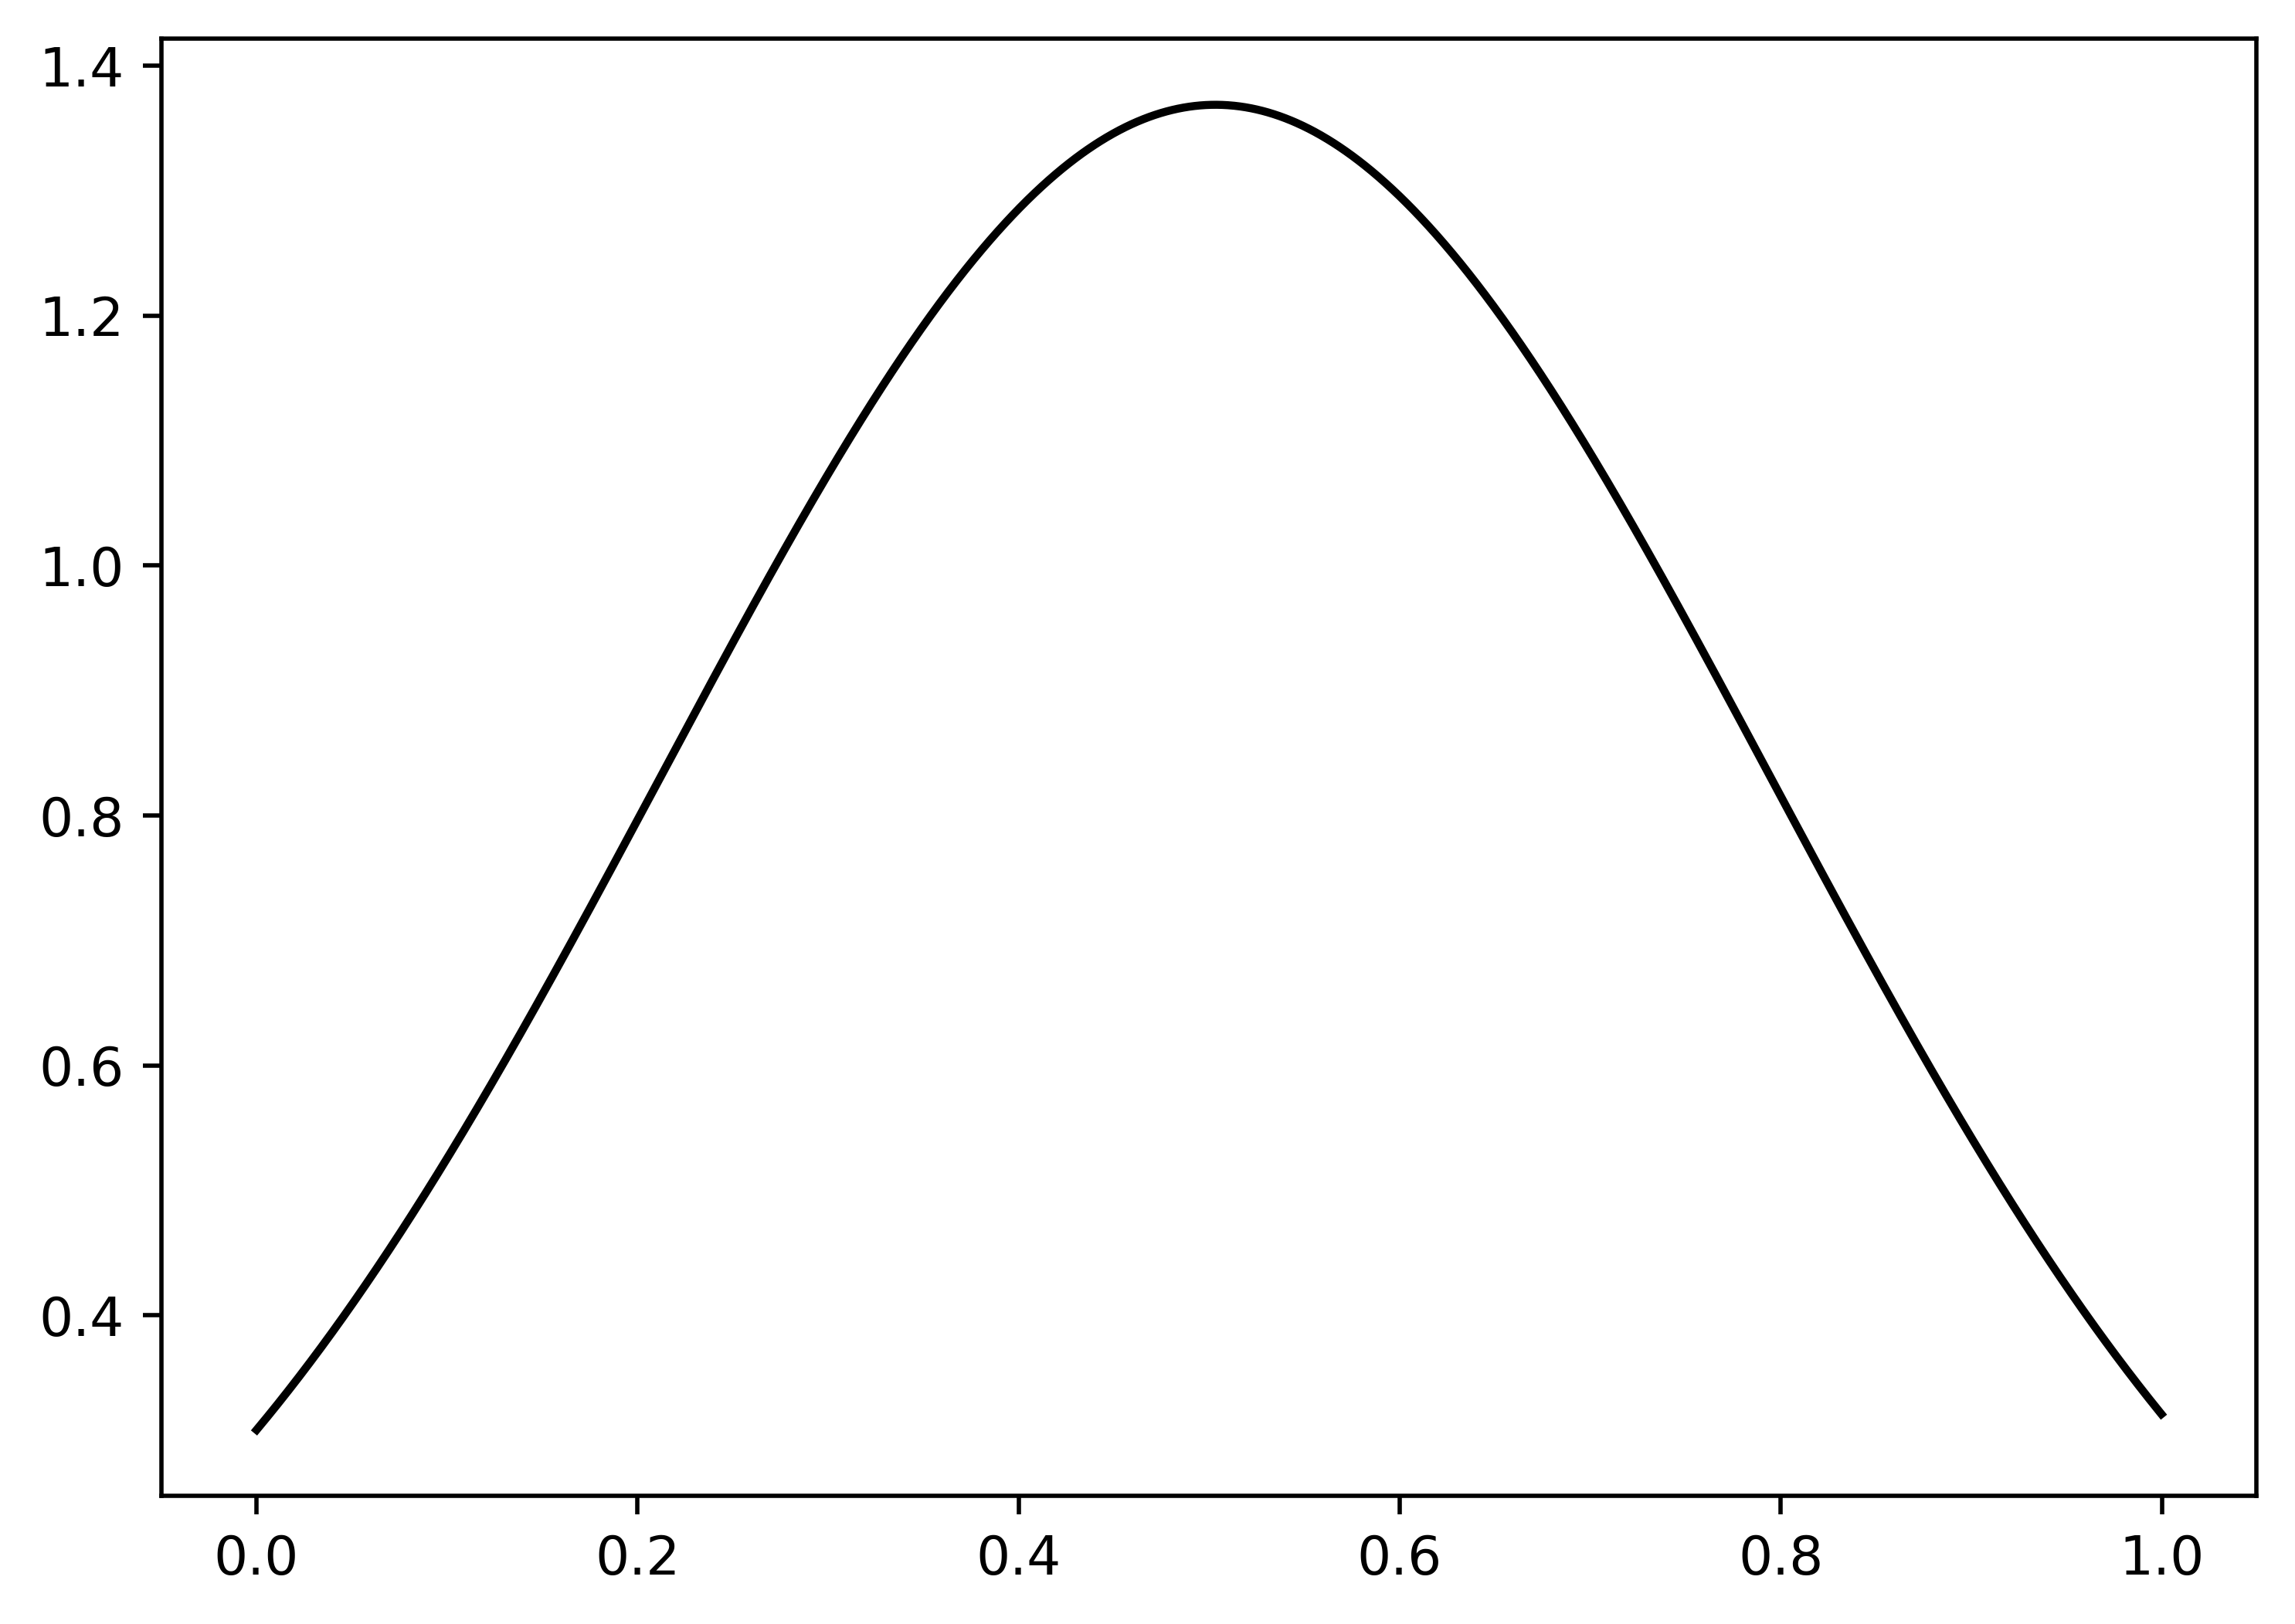

In [117]:
plt.plot(df_uni[0].sort_values(), cv2_pdf, color="Black", label="Cultivar_A")
plt.xlim(bins3)
plt.ylim(bins3)
plt.legend()
plt.xlabel("Grain area (mm2)", size=10)
plt.ylabel("Frequency", size=10)
plt.grid(True, alpha=0.3, linestyle="--")
plt.rcParams["figure.figsize"] = [7,5]  # 가로, 세로 인치 조정
plt.rcParams["figure.dpi"] = 500   # 해상도 조정
plt.show()

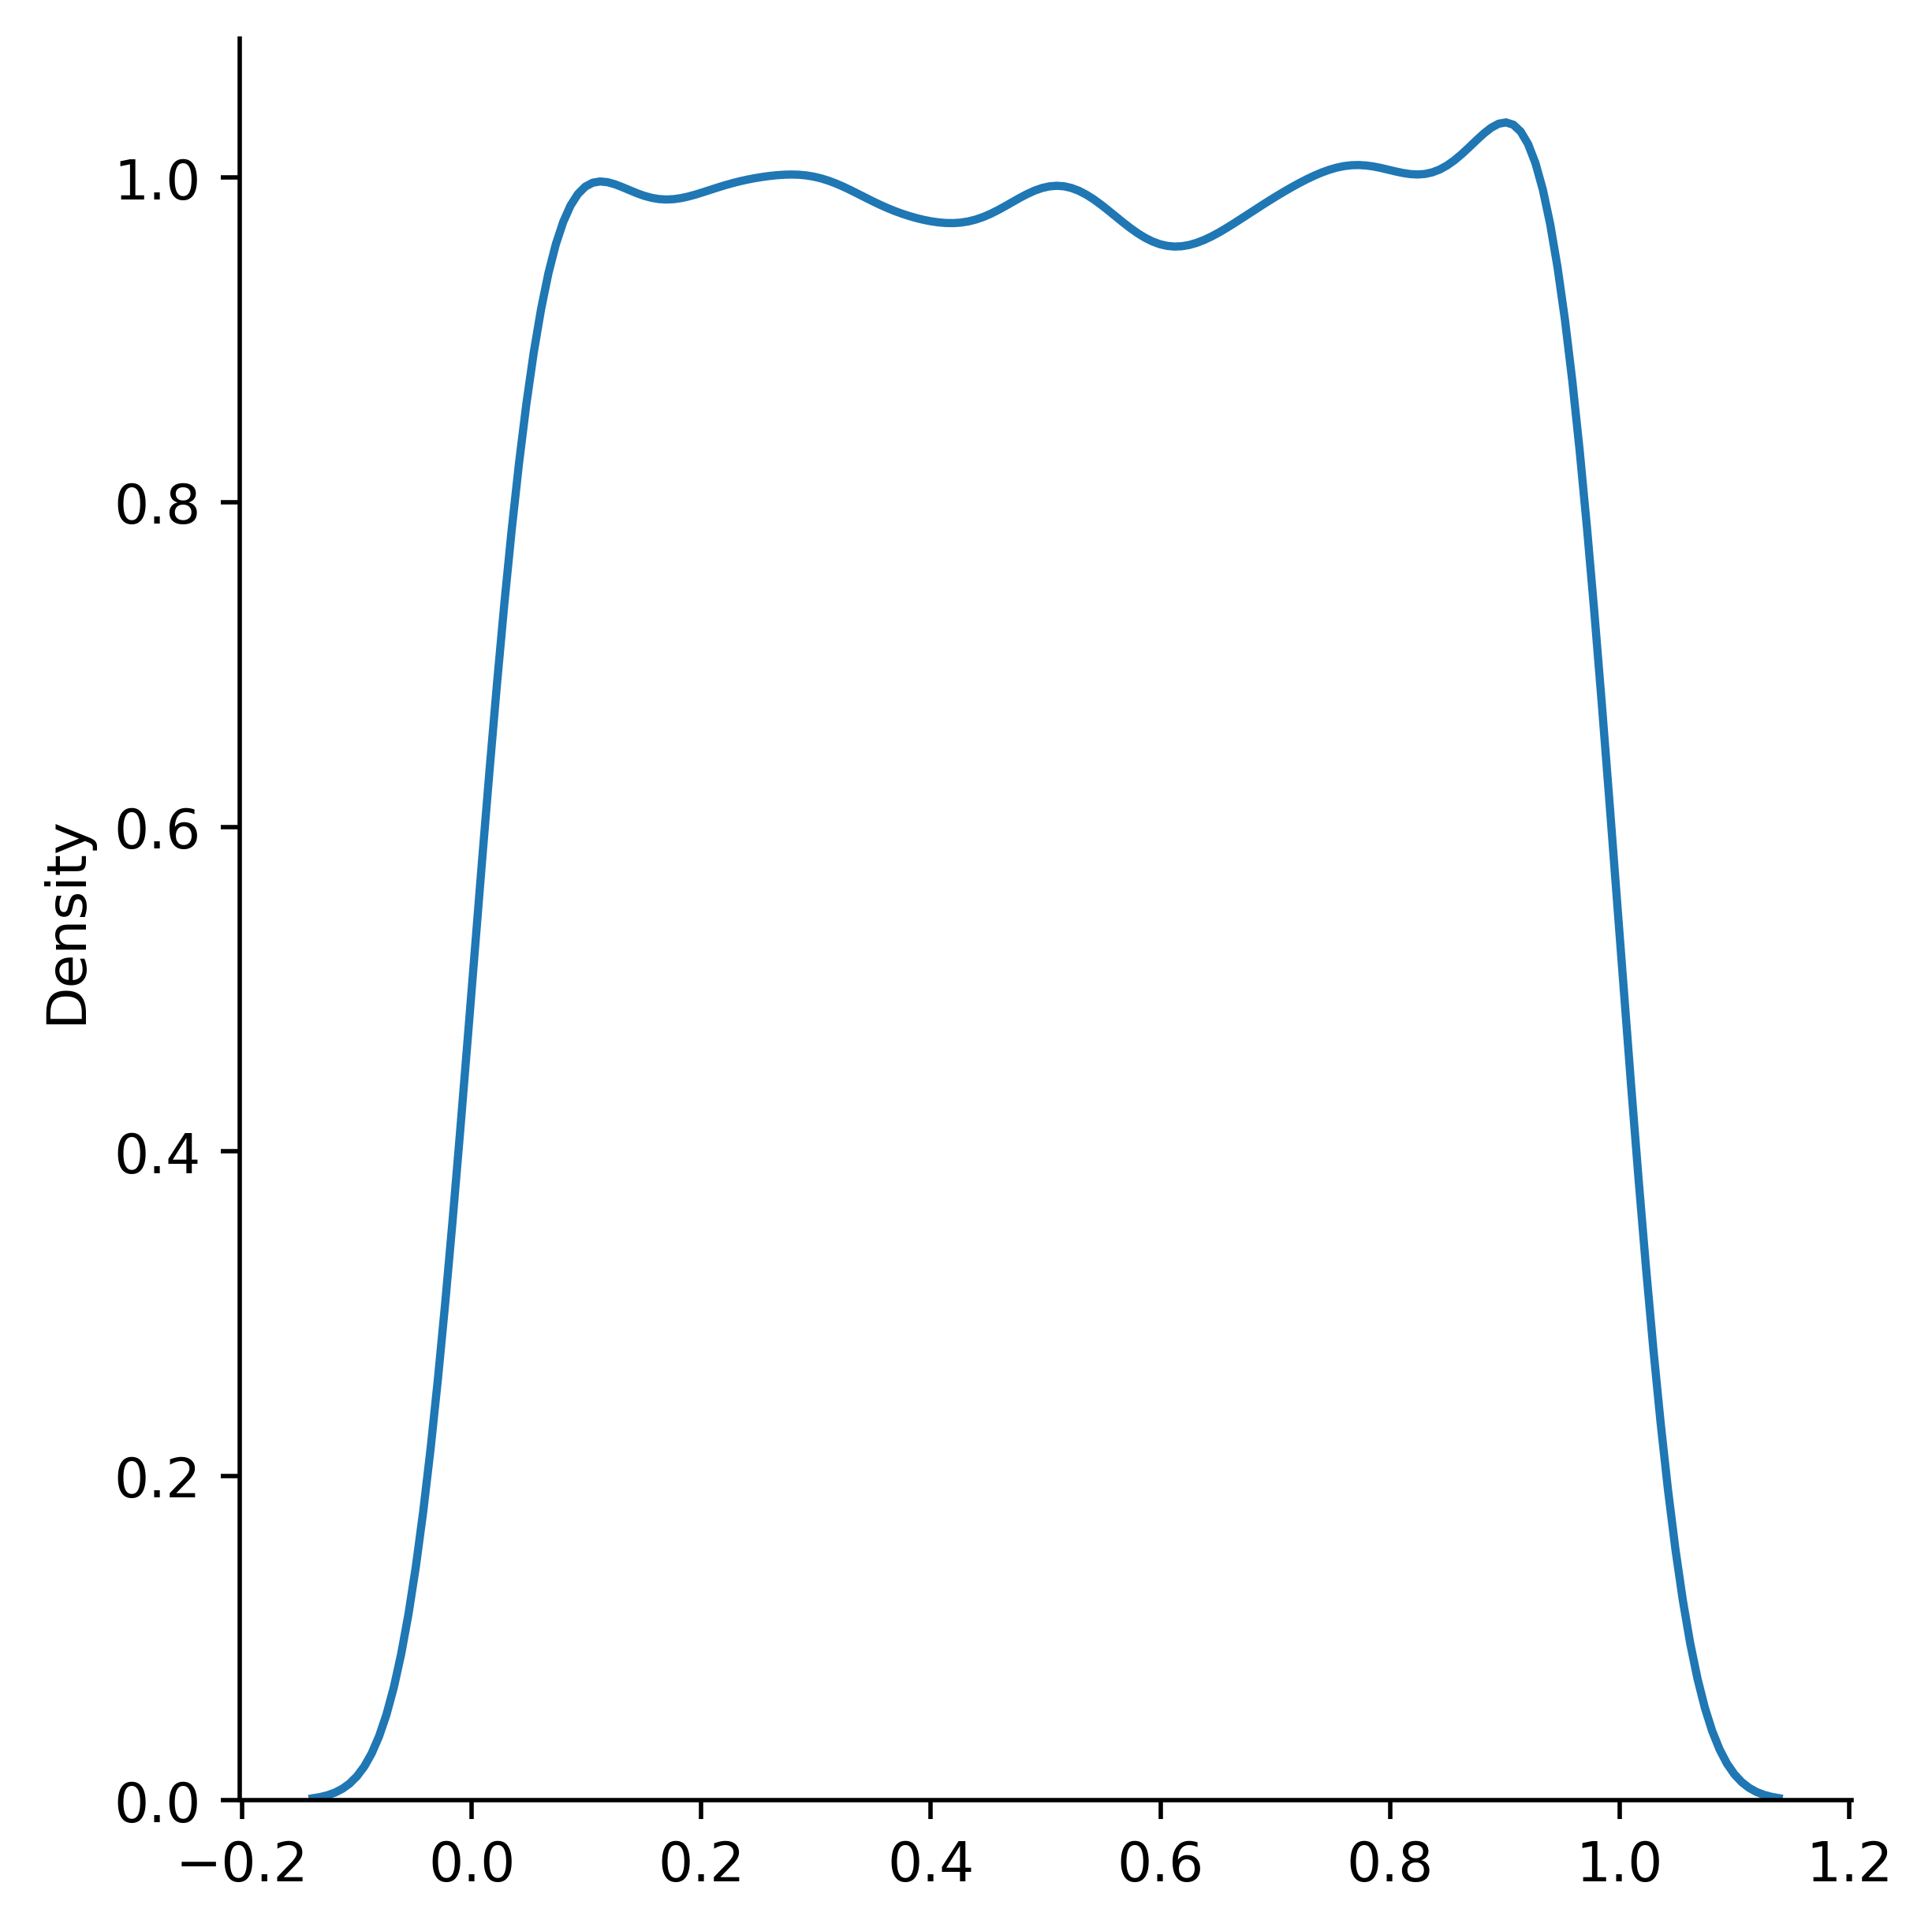

In [120]:
import seaborn as sns

sns.displot(uni, kind="kde")
plt.show()

# Detecting and Filtering Outliers - 이상값(치)  209p

In [121]:
randframe = pd.DataFrame(np.random.randn(1000,3))

In [122]:
randframe.describe()

,0,1,2
count,1000.000000,1000.000000,1000.000000
mean,0.032994,-0.042264,-0.039374
std,1.029864,0.992550,1.006195
min,-3.348588,-3.110884,-3.507011
25%,-0.640894,-0.716207,-0.695065
50%,0.062183,-0.051427,-0.041955
75%,0.735728,0.625744,0.658798
max,3.146847,3.056572,3.224110


In [123]:
randframe.std()

0    1.029864
1    0.992550
2    1.006195
dtype: float64

In [126]:
randframe[(np.abs(randframe) > (3*randframe.std())).any(1)]

# 표준편차의 3배보다 큰 값을 찾아라
# any(1) : 어떤 하나라도

,0,1,2
0,3.092413,1.110824,-1.097272
90,-0.235828,-0.889434,3.224110
176,-1.779501,-0.778629,-3.049716
191,-0.950016,0.656399,-3.507011
221,1.001692,-0.522533,-3.029789
237,-3.348588,-0.016224,-0.427593
243,0.611458,0.816500,-3.068378
255,-3.273434,0.025075,-0.181602
299,0.025895,-0.004531,-3.265604
414,-0.178620,-3.110884,0.183026


In [129]:
s_list = ['A', 'B', 'C']
list = [random.sample(s_list) for i in range(5)]

ValueError: Sample larger than population or is negative

In [133]:
import string

s_list = []
for x in range(5):
  s_list.append((''.join(random.choice(string.ascii_letters ) for _ in range(3))))

In [134]:
s_list

['wMk', 'lQo', 'lcc', 'jjs', 'aAO']

In [135]:
str = '-'.join(s_list)

str

'wMk-lQo-lcc-jjs-aAO'

In [ ]:
ord('a')
ord('z')
chr(97)
chr(122)

# 정규표현식

In [137]:
import re

text = 'This is my address: 16 Bolton Avenue, Boston'

re.findall('A\w+', text)

['Avenue']